# Aprendizado não supervisionado

## Modelagem de tópicos - Processamento de Linguagem Natural

Modelagem de tópicos é uma abordagem estatística e probabilística utilizada para descobrir automaticamente a estrutura temática latente em grandes coleções de textos. Em vez de classificar documentos com categorias previamente definidas, ela parte do princípio de que os temas estão “escondidos” nos padrões de coocorrência das palavras e podem ser inferidos a partir deles. Trata-se, portanto, de uma técnica de aprendizado não supervisionado, amplamente aplicada em mineração de texto, ciência de dados e processamento de linguagem natural.

A ideia central é que cada documento não trata apenas de um único assunto, mas de uma combinação de tópicos em diferentes proporções. Por exemplo, um artigo pode ser 60% economia e 40% política. Ao mesmo tempo, cada tópico é representado por uma distribuição probabilística de palavras — ou seja, certas palavras têm maior probabilidade de aparecer quando aquele tópico está presente. Assim, um tópico relacionado à saúde pode atribuir altas probabilidades a palavras como “hospital”, “paciente” e “tratamento”, enquanto um tópico relacionado a tecnologia pode privilegiar termos como “software”, “dados” e “algoritmo”.

O funcionamento da modelagem de tópicos baseia-se na análise de padrões estatísticos de frequência e coocorrência de termos. Inicialmente, os textos passam por um pré-processamento que inclui tokenização, remoção de palavras muito comuns (stopwords) e, frequentemente, lematização ou stemming. Em seguida, os documentos são representados numericamente, geralmente por meio do modelo bag-of-words, que registra quantas vezes cada palavra aparece em cada documento. A partir dessa representação matricial, o algoritmo busca decompor o conjunto de dados em duas estruturas principais: a distribuição de tópicos por documento e a distribuição de palavras por tópico.

O modelo mais conhecido nessa área é o Latent Dirichlet Allocation (LDA), proposto por David Blei, Andrew Ng e Michael I. Jordan em 2003. O LDA assume que os documentos são gerados por um processo probabilístico em que, para cada palavra, escolhe-se primeiro um tópico de acordo com a distribuição daquele documento e, em seguida, escolhe-se uma palavra de acordo com a distribuição daquele tópico. O termo “latente” refere-se ao fato de que os tópicos não são observáveis diretamente; eles precisam ser inferidos a partir dos dados.

Do ponto de vista matemático, a modelagem de tópicos pode ser entendida como uma forma de fatoração probabilística da matriz documento-termo. Em vez de simplesmente reduzir dimensionalidade como em técnicas lineares clássicas, ela procura modelar explicitamente a geração dos dados textuais. O resultado é uma representação mais compacta e interpretável: cada documento passa a ser descrito por um vetor de proporções de tópicos, o que facilita análises exploratórias, visualizações, agrupamentos e até etapas posteriores de aprendizado supervisionado.

Na prática, a modelagem de tópicos é especialmente útil quando se trabalha com grandes volumes de texto, como bases de notícias, artigos científicos, comentários de usuários, registros jurídicos ou dados de redes sociais. Ela permite identificar automaticamente padrões temáticos dominantes, acompanhar a evolução de assuntos ao longo do tempo e organizar documentos em estruturas mais compreensíveis. Assim, além de reduzir complexidade, a técnica revela relações semânticas implícitas que não seriam facilmente percebidas por inspeção manual.

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from urllib.request import urlopen 
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

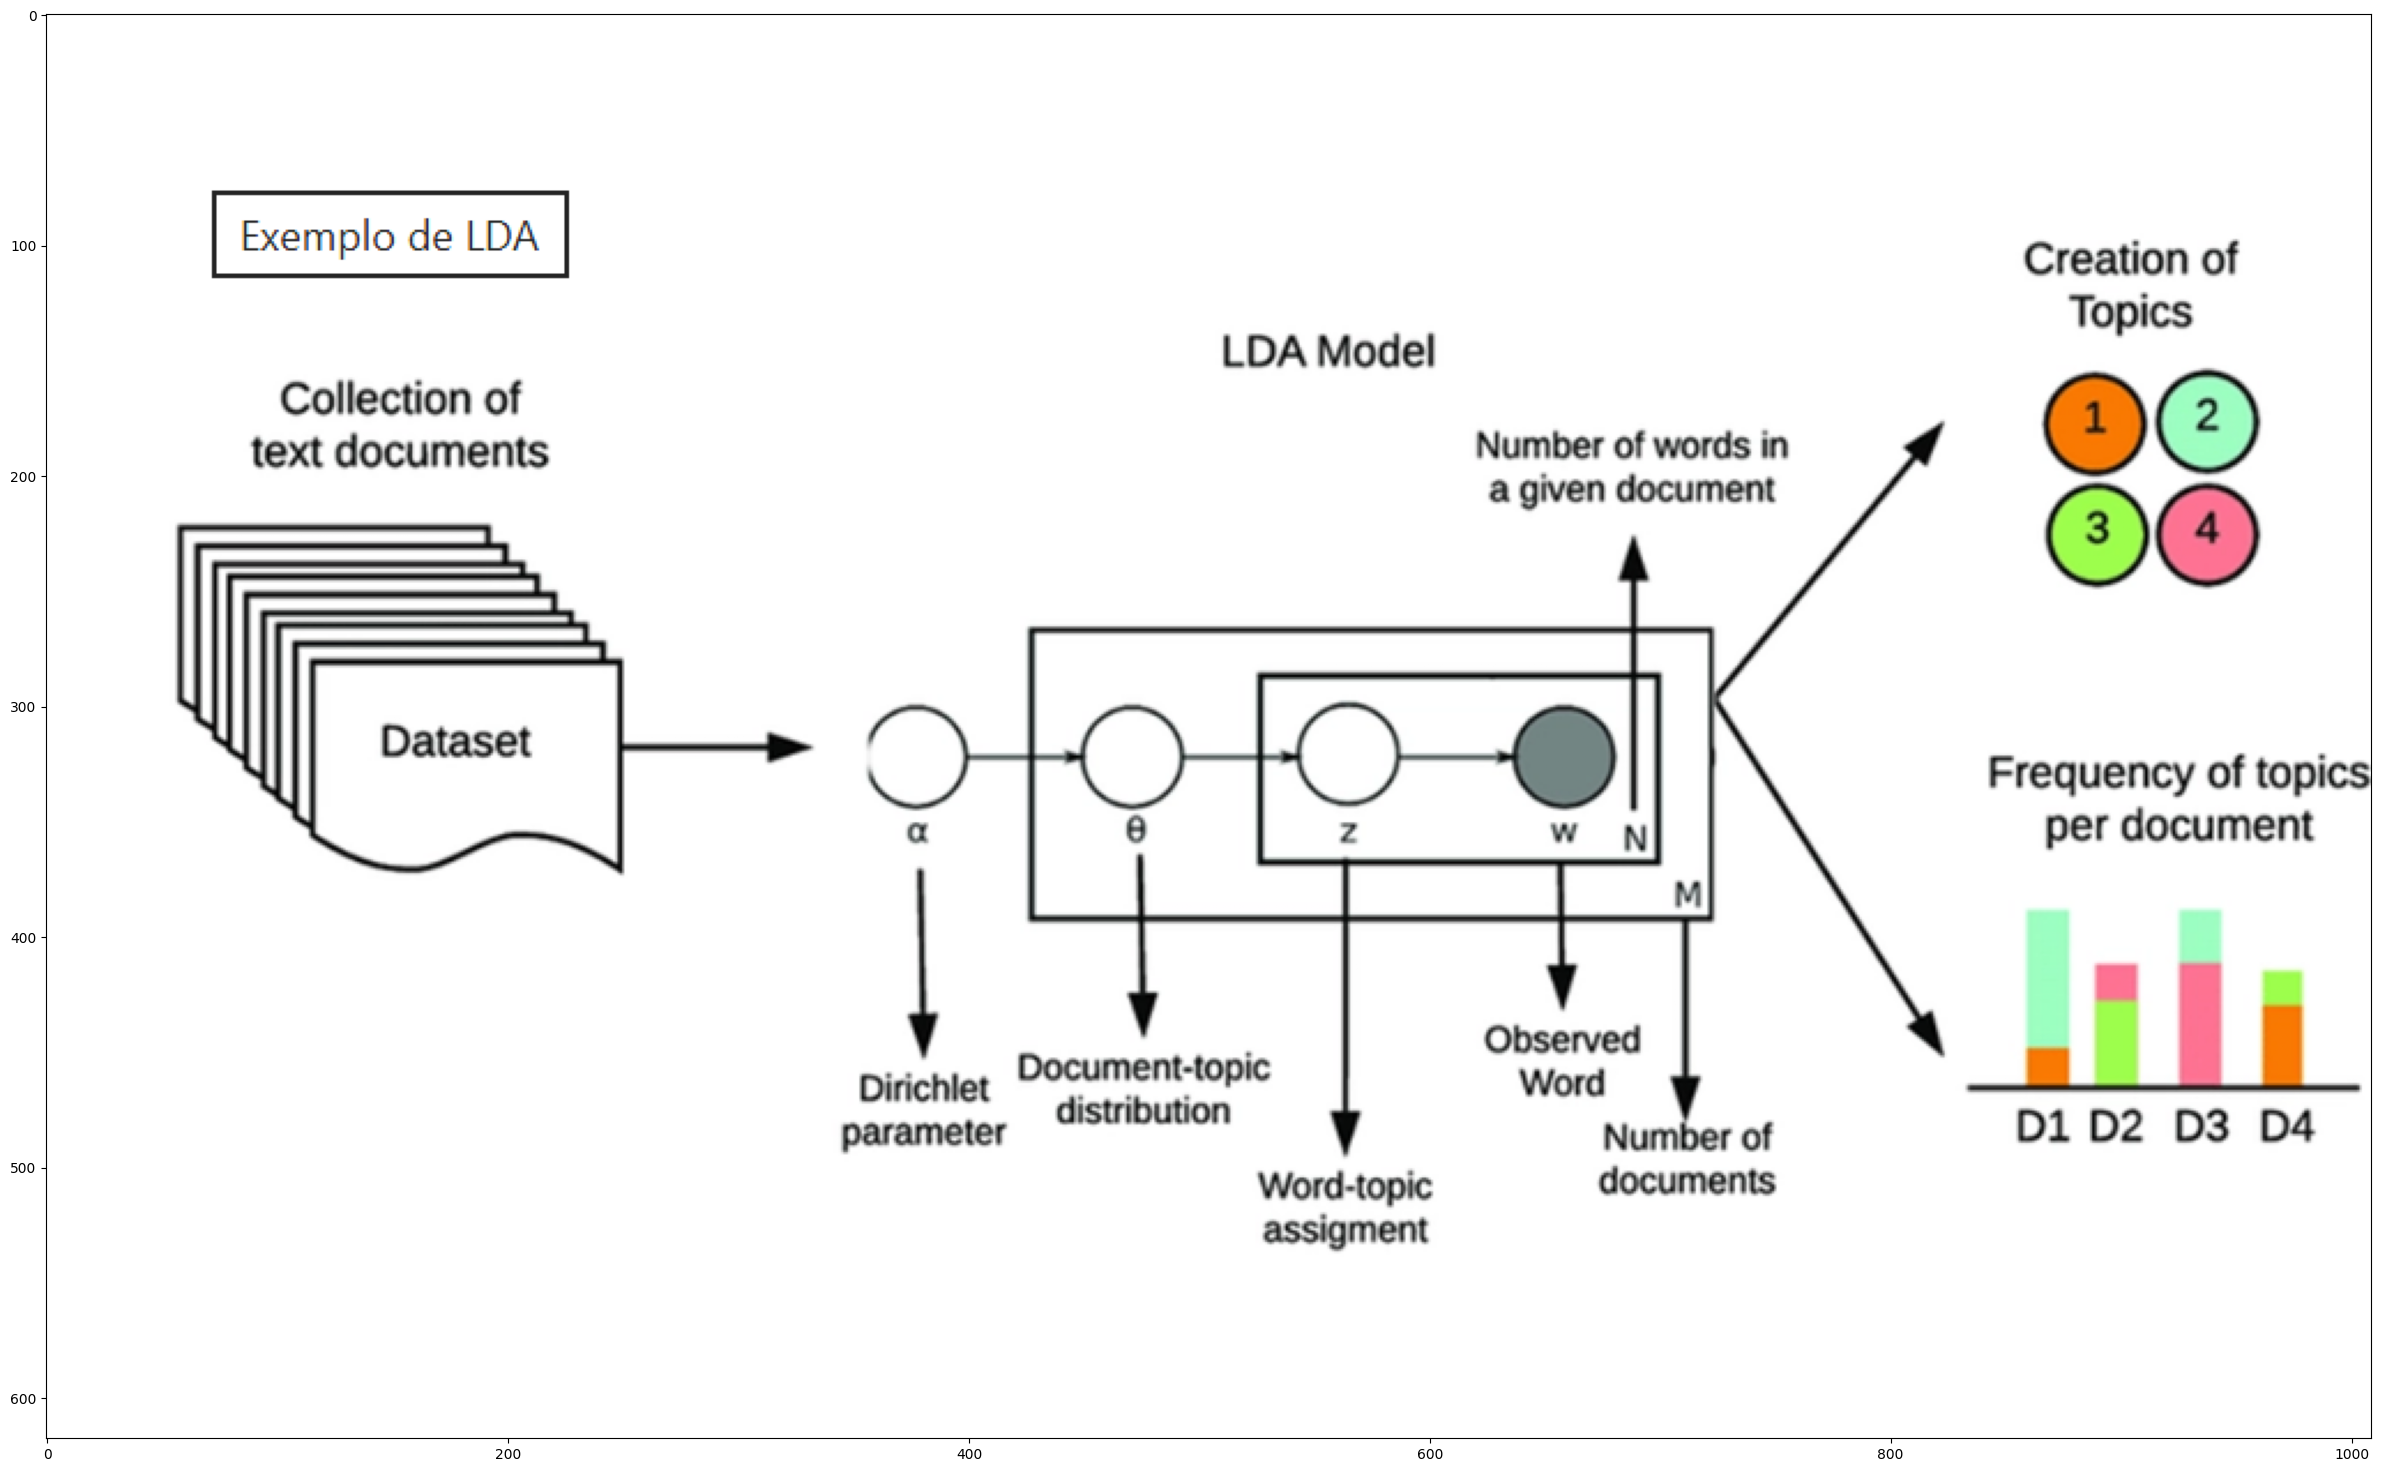

In [3]:
im = plt.imread('./images/lda.png')
plt.figure(figsize = (30,30))
plt.imshow(im)
plt.show()

* Cada documento é apenas uma coleção de palavras ("bag of words"). Assim, a ordem das palavras e o seu papel gramatical não são considerados no modelo.

* Remoção de stopwords: palavras como sou/é/e/de/um/do/mas... não carregam nenhuma informação sobre os "tópicos" e, portanto, podem ser eliminadas dos documentos como numa etapa de pré-processamento. 

* Palavras que aparecem muitas vezes em todos os documentos também podem ser removidas, já que não acrescentam nenhuma informação específica que possa destacar o documento.

* Sabemos de antemão quantos tópicos queremos. "k" é pré-definido.

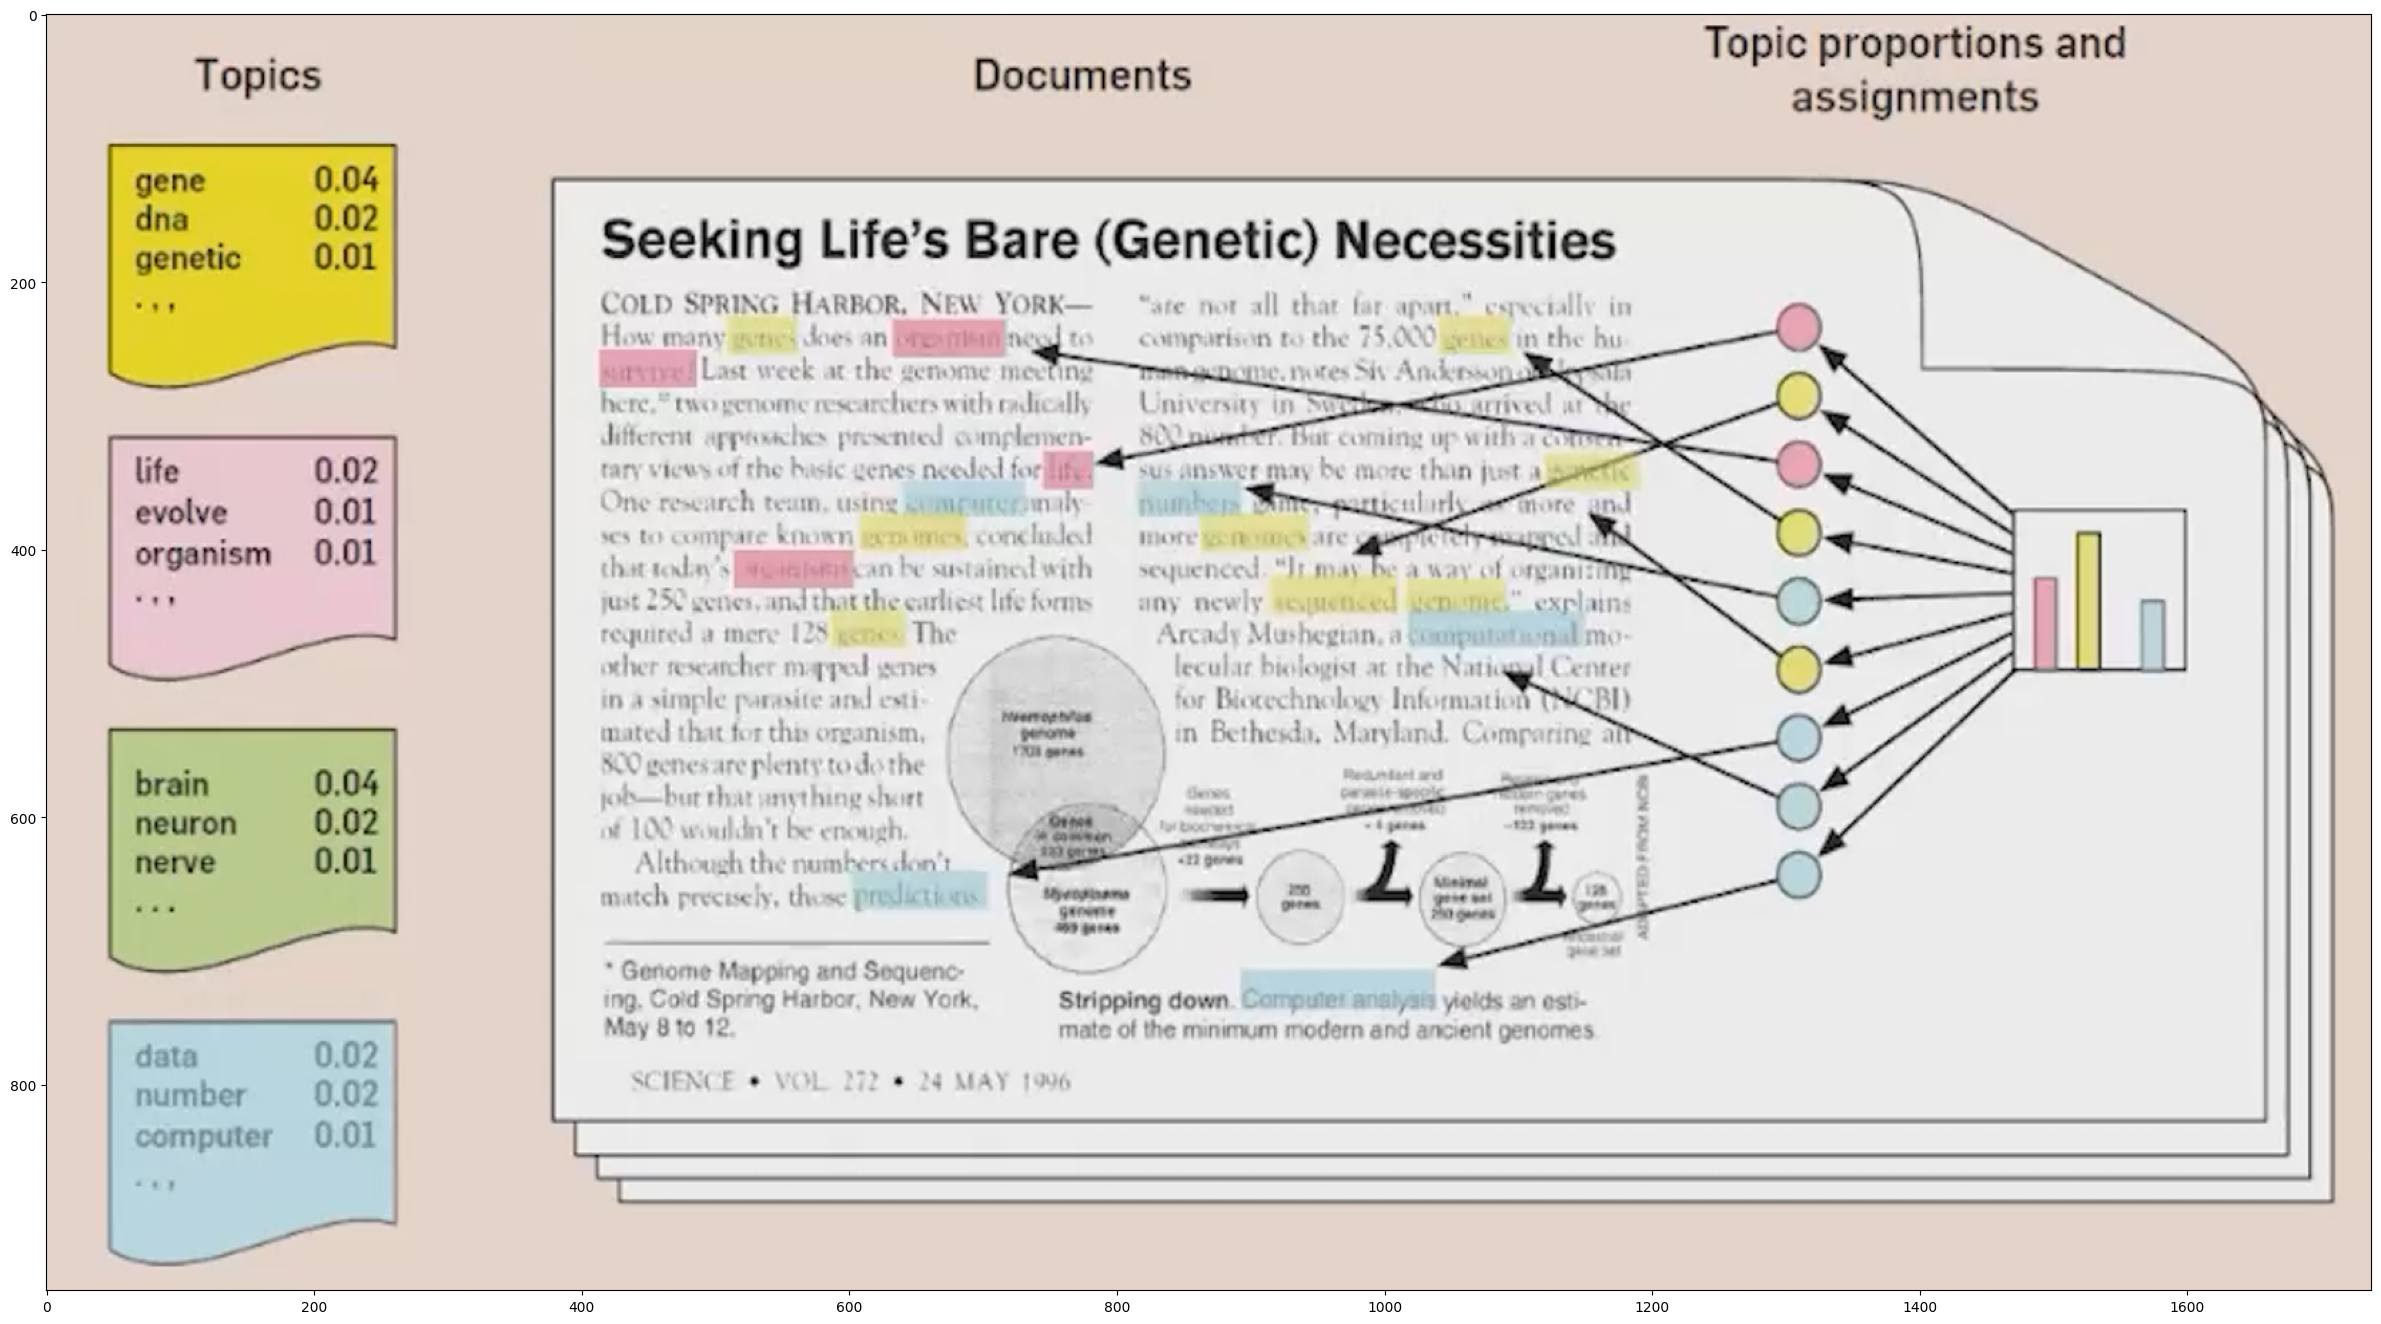

In [3]:
im = plt.imread('./images/lda2.png')
plt.figure(figsize = (30,30))
plt.imshow(im)
plt.show()

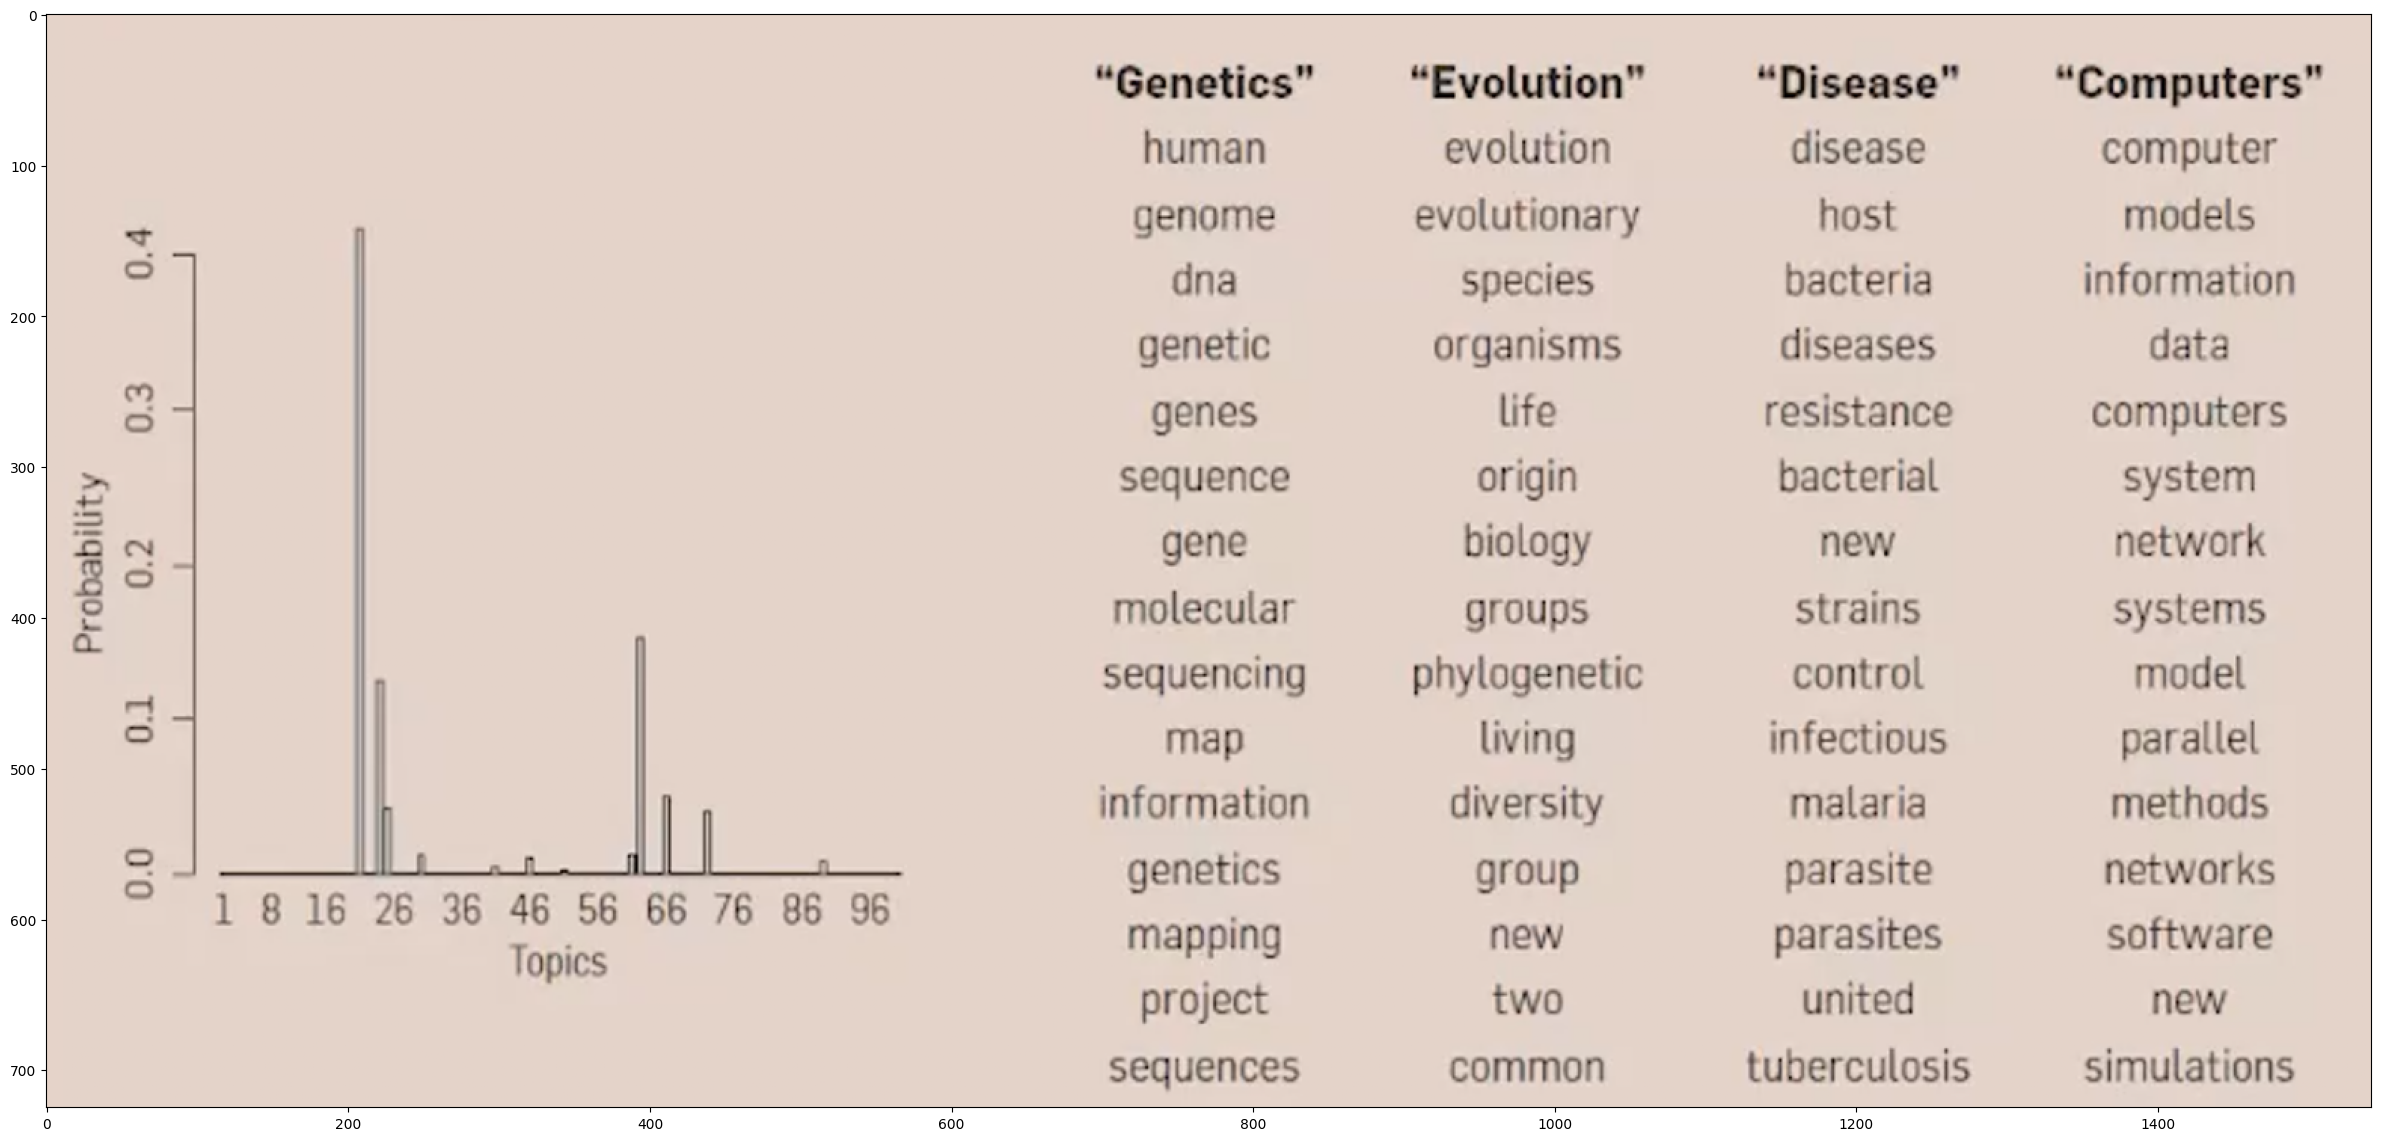

In [4]:
im = plt.imread('./images/lda3.png')
plt.figure(figsize = (30,30))
plt.imshow(im)
plt.show()

## Hands-on!

Vamos explorar o algoritmo LDA para o problema de modelagem de tópico a partir do livro "O Mágico de Oz" e outros textos do mesmo universo.
Usaremos um subconjunto de livros de L. Frank Baum que fazem parte de domínio público.

In [9]:
url = 'https://www.gutenberg.org/files/55/55-h/55-h.htm'
html = urlopen(url).read()
soup = BeautifulSoup(html, features = 'html.parser')

In [10]:
#Remove qualquer CSS ou JavaScript
for script in soup(["script","style"]):
    script.extract()

In [11]:
text = soup.get_text()
documents = [] 
documents.append(text)

In [13]:
#repete o processo para outros quatro livros 

url = 'https://www.gutenberg.org/files/54/54-h/54-h.htm'
html = urlopen(url).read()
soup = BeautifulSoup(html, features = 'html.parser')
for script in soup(["script","style"]):
    script.extract()
text = soup.get_text()
documents.append(text)

url = 'https://www.gutenberg.org/files/33361/33361-h/33361-h.htm'
html = urlopen(url).read()
soup = BeautifulSoup(html, features = 'html.parser')
for script in soup(["script","style"]):
    script.extract()
text = soup.get_text()
documents.append(text)

url = 'https://www.gutenberg.org/files/22566/22566-h/22566-h.htm'
html = urlopen(url).read()
soup = BeautifulSoup(html, features = 'html.parser')
for script in soup(["script","style"]):
    script.extract()
text = soup.get_text()
documents.append(text)

url = 'https://www.gutenberg.org/files/26624/26624-h/26624-h.htm'
html = urlopen(url).read()
soup = BeautifulSoup(html, features = 'html.parser')
for script in soup(["script","style"]):
    script.extract()
text = soup.get_text()
documents.append(text)

In [15]:
#Criando tokens e vocabulario 
cv = CountVectorizer()
df = cv.fit_transform(documents)
vocab = cv.get_feature_names_out()

In [16]:
print(df[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2925 stored elements and shape (1, 9138)>
  Coords	Values
  (0, 8064)	3007
  (0, 8997)	24
  (0, 8978)	40
  (0, 5455)	850
  (0, 5590)	165
  (0, 6149)	3
  (0, 3797)	3
  (0, 7617)	7
  (0, 2712)	2
  (0, 252)	2
  (0, 1342)	92
  (0, 3398)	2
  (0, 891)	2
  (0, 8097)	149
  (0, 1113)	1
  (0, 4374)	261
  (0, 2266)	1
  (0, 8199)	1118
  (0, 5236)	191
  (0, 3635)	102
  (0, 3420)	14
  (0, 1804)	5
  (0, 8913)	7
  (0, 1896)	2
  (0, 4349)	2
  :	:
  (0, 1051)	1
  (0, 7332)	1
  (0, 9033)	1
  (0, 2327)	1
  (0, 8550)	1
  (0, 3666)	1
  (0, 2922)	1
  (0, 8893)	1
  (0, 2354)	1
  (0, 4550)	1
  (0, 5689)	1
  (0, 8812)	1
  (0, 4531)	1
  (0, 7436)	1
  (0, 5658)	1
  (0, 7398)	1
  (0, 1633)	1
  (0, 8869)	1
  (0, 867)	1
  (0, 864)	1
  (0, 7689)	1
  (0, 1346)	1
  (0, 2201)	1
  (0, 3302)	1
  (0, 4530)	1


In [17]:
print(vocab[8064])

the


Não é surpresa que a palavra "the" tenha sido usada tantas vezes. Porém, essa palavra é uma stopword e deve ser removida.

In [19]:
lda = LatentDirichletAllocation(n_components=4, doc_topic_prior=1)
lda.fit(df)

,"n_components n_components: int, default=10Number of topics... versionchanged:: 0.19 ``n_topics`` was renamed to ``n_components``",4
,"doc_topic_prior doc_topic_prior: float, default=NonePrior of document topic distribution `theta`. If the value is None,defaults to `1 / n_components`.In [1]_, this is called `alpha`.",1
,"topic_word_prior topic_word_prior: float, default=NonePrior of topic word distribution `beta`. If the value is None, defaultsto `1 / n_components`.In [1]_, this is called `eta`.",None
,"learning_method learning_method: {'batch', 'online'}, default='batch'Method used to update `_component`. Only used in :meth:`fit` method.In general, if the data size is large, the online update will be muchfaster than the batch update.Valid options:- 'batch': Batch variational Bayes method. Use all training data in each EM update. Old `components_` will be overwritten in each iteration.- 'online': Online variational Bayes method. In each EM update, use mini-batch of training data to update the ``components_`` variable incrementally. The learning rate is controlled by the ``learning_decay`` and the ``learning_offset`` parameters... versionchanged:: 0.20 The default learning method is now ``""batch""``.",'batch'
,"learning_decay learning_decay: float, default=0.7It is a parameter that control learning rate in the online learningmethod. The value should be set between (0.5, 1.0] to guaranteeasymptotic convergence. When the value is 0.0 and batch_size is``n_samples``, the update method is same as batch learning. In theliterature, this is called kappa.",0.7
,"learning_offset learning_offset: float, default=10.0A (positive) parameter that downweights early iterations in onlinelearning. It should be greater than 1.0. In the literature, this iscalled tau_0.",10.0
,"max_iter max_iter: int, default=10The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the :meth:`fit` method, and not the:meth:`partial_fit` method.",10
,"batch_size batch_size: int, default=128Number of documents to use in each EM iteration. Only used in onlinelearning.",128
,"evaluate_every evaluate_every: int, default=-1How often to evaluate perplexity. Only used in `fit` method.set it to 0 or negative number to not evaluate perplexity intraining at all. Evaluating perplexity can help you check convergencein training process, but it will also increase total training time.Evaluating perplexity in every iteration might increase training timeup to two-fold.",-1
,"total_samples total_samples: int, default=1e6Total number of documents. Only used in the :meth:`partial_fit` method.",1000000.0
,"perp_tol perp_tol: float, default=1e-1Perplexity tolerance. Only used when ``evaluate_every`` is greater than 0.",0.1


In [20]:
topic_words = {}
n_top_words = 10 

for topic, comp in enumerate(lda.components_):
    word_idx = np.argsort(comp)[::-1][:n_top_words]
    topic_words[topic] = [vocab[i] for i in word_idx]

for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print(' %s' % ', '.join(words))

Topic: 0
 limping, portal, deed, locks, waken, stretch, muddy, extra, clump, afterwards
Topic: 1
 shaggy, man, bright, button, toto, fox, polly, polychrome, pom, rainbow
Topic: 2
 the, and, to, of, in, you, it, was, that, he
Topic: 3
 the, and, to, of, in, you, he, it, was, that


Remove Stopwords

In [22]:
cv = CountVectorizer(stop_words='english') 
df = cv.fit_transform(documents)
vocab = cv.get_feature_names_out()

In [24]:
lda = LatentDirichletAllocation(n_components=4, doc_topic_prior=1)
lda.fit(df)

topic_words = {}
n_top_words = 10 

for topic, comp in enumerate(lda.components_):
    word_idx = np.argsort(comp)[::-1][:n_top_words]
    topic_words[topic] = [vocab[i] for i in word_idx]

for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print(' %s' % ', '.join(words))

Topic: 0
 dorothy, said, scarecrow, woodman, lion, oz, great, tin, little, witch
Topic: 1
 said, dorothy, man, pg, little, scarecrow, asked, ozma, king, wizard
Topic: 2
 sob, solemnly, unlock, carts, squirrels, stretch, waken, lain, limping, clump
Topic: 3
 sob, solemnly, unlock, carts, squirrels, stretch, waken, lain, limping, clump
